FakeBrCorpus:
- Dataset: https://github.com/roneysco/Fake.br-Corpus
- Docs: https://sites.icmc.usp.br/taspardo/PROPOR2018-MonteiroEtAl.pdf

TwitterBR:
- Dataset: https://github.com/phfaustini/BRACIS2019_FAKENEWS
- Docs: https://ieeexplore.ieee.org/document/8923888/footnotes#footnotes

fake_real_news_dataset:
- Dataset: https://github.com/GeorgeMcIntire/fake_real_news_dataset
- Docs: https://ieeexplore.ieee.org/abstract/document/8257971/footnotes#footnotes

Fakenewsdata1
- Dataset: https://github.com/rpitrust/fakenewsdata1
- Docs: https://arxiv.org/pdf/1703.09398.pdf

News-credibility
- Dataset: https://github.com/mhardalov/news-credibility
- Docs: https://arxiv.org/pdf/1911.08125.pdf


In [118]:
import os, re, time
import gensim, nltk
import pandas as pd
import numpy as np
from nltk.test.gensim_fixt import setup_module
from gensim.models import word2vec
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
setup_module()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/knguyen02311/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
PROJECT_DIR = '/media/knguyen02311/Data Disk/DataScience/data_mining/is252/TermProject/'
STOP_WORDS_ENGLISH = nltk.corpus.stopwords.words('english')
STOP_WORDS_PORTUGESE = nltk.corpus.stopwords.words('portuguese')

### Load datasets:

In [5]:
fake_br_corpus_df = pd.read_csv(os.path.join(PROJECT_DIR, 'dataset/Fake.br-Corpus/preprocessed/pre-processed.csv'))
fake_or_real_news_df = pd.read_csv(os.path.join(PROJECT_DIR, 'dataset/fake_real_news_dataset/fake_and_real_news_dataset.csv'))

In [5]:
fake_br_corpus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              7200 non-null   int64 
 1   label              7200 non-null   object
 2   preprocessed_news  7200 non-null   object
dtypes: int64(1), object(2)
memory usage: 168.9+ KB


In [77]:
fake_br_corpus_df.sample(5)

,index,label,preprocessed_news
66,66,fake,grampo pf mostra lula chamando rodrigo maia eu...
1510,1510,fake,lula tenta desmoralizar sergio moro vez alguem...
4262,4262,true,it coisa filme sobre lava jato chegam cinemas ...
4539,4539,true,lista fachin prefeitos sao paulo maioria acusa...
1217,1217,fake,ivete interrompe show explica fas sobre po bra...


In [6]:
fake_or_real_news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   idd     4594 non-null   object
 1   title   4593 non-null   object
 2   text    4594 non-null   object
 3   label   4594 non-null   object
dtypes: object(4)
memory usage: 143.7+ KB


In [78]:
fake_or_real_news_df.sample(5)

,idd,title,text,label
4449,PivW8ReuPd,Iraqi Elite Forces Stretched Thin by ISIS Tact...,bombings surprise attacks force golden divisio...,FAKE
1194,6D3v6tAt&Z,Reddit administrators accused of censorship,administrators at the popular online forum red...,REAL
553,HV4BnCE3Ot,A whirlwind day in D.C. showcases Trump’s unor...,donald trump endorsed an unabashedly noninterv...,REAL
1628,MIO_gRhrd4,Hollywood heavyweights threaten Georgia boycot...,georgia gov nathan deal is facing mounting pre...,REAL
1784,BA1b(!t57T,The Daily 202: Trump really is in danger of lo...,salt lake citythe revelations of recent days a...,REAL


In [26]:
fake_br_corpus_df.loc[1, :]["preprocessed_news"]

'ray peita bolsonaro conservador fake entrevista danilo gentili divide direita site vem avisando jair bolsonaro deveria abandonar pauta estatista vez fazer discurso convincente boa parte liberais conservadores brasil querem ver livres amarras estatais tudo bem pesquisas ainda dizem maior parte povo contra privatizacoes indice pouco povo facil ser revertido ademais bolsonaro deveria falar direitistas vez focar tanto petistas arrependidos recentemente disse pensaria vezes antes privatizar petrobras nao caia maos chineses algo tipo deveria ter dito garanto privatizacao petrobras tambem garanto chineses nao irao nao deixaria brechas jeito falou parece suposto medo venda chineses pretexto evitar privatizacao la direita vai ter adotar alternativas foquem estado reduzido diminuicao impostos venda estatais alem joao amoedo rey fazendo vicejar tipo discurso ainda candidatura fase inicial complicado bolsonaro aparecam pessoas direita propondo visao economicamente direitista economia enfim veja r

In [30]:
fake_or_real_news_df.loc[1, :]['text']

'Ever since Texas laws closed about half of the state\'s abortion clinics in 2013, researchers have been trying to understand just how much burden those laws place on women who are trying to access abortion. That\'s important because the Supreme Court is now considering those laws as part of Whole Woman\'s Health v. Hellerstedt, the court\'s most consequential abortion case in decades. If it finds that the laws place an "undue burden" on women, they\'ll likely be struck down.\n\nResearchers with the Texas Policy Evaluation Project (TxPEP), looking into exactly that, have already found that some women had to wait as much as three weeks longer for an appointment. Some women they\'ve interviewed weren\'t able to secure an abortion at all, due to the logistical and financial barriers.\n\nNow, TxPEP has published a significant study, in the American Journal of Public Health, on the effects of HB2, the omnibus anti-abortion bill that the Court could end up partially striking down. The study 

In [7]:
fake_br_corpus_df.sample(10)

,index,label,preprocessed_news
6353,6353,true,odebrecht doou r milhao maguito daniel vilela ...
3033,3033,fake,guerra nuclear pode comecar qualquer momento t...
2020,2020,fake,expressao lula diz tudo acabou sonho bandidos ...
1022,1022,fake,anatel afirma prioridade universalizacao banda...
2677,2677,fake,integrantes mst confessam governo aluga varios...
6674,6674,true,buraco negro informacao seguranca publica bras...
3712,3712,true,anthony garotinho ouvido vez sobre suposta agr...
4696,4696,true,primeira turma stf discute nesta terca pedido ...
5798,5798,true,julio andrade explica atuar via mao dupla inte...
682,682,fake,pastor igreja eike irrita dispara seguido cris...


### Text preprocessing:

- Lowercase
- Remove stopwords and non-alphanumeric characters
- Tokenize

In [107]:
def text_preprocess(text):
   sentence = re.sub(r'[^\w\s]|[0-9]|_', '', text)
   sentence = re.sub(r'\xa0|\n|\t', ' ', sentence)
   sentence = " ".join(sentence.split()).lower()
   return sentence
   

def one_hot_label(label, real_lb='true'):
   return 1 if label == real_lb else 0

def build_corpus(data, col_name, stopword_filter=False):
   "Creates a list of lists containing words from each sentence"
   corpus = []
   for sentence in data[col_name].items():
      word_list = sentence[1].split(" ")
      if stopword_filter: 
         filtered_word_list = [w for w in word_list if not w in STOP_WORDS_ENGLISH]
         corpus.append(filtered_word_list)
      else:
         corpus.append(word_list)
   return corpus


def vectorize(splited_sentence, w2v_model):
   # words_vecs = []
   # for word in splited_sentence:
   #    if word in w2v_model.wv:
   #       words_vecs.append(w2v_model.wv[word])
   #    else:
   #       words_vecs.append(np.zeros((100)))
   # return words_vecs
   # # return words_vecs.mean(axis=0)
   
   words_vecs = [w2v_model.wv[word] for word in splited_sentence if word in w2v_model.wv]
   if len(words_vecs) == 0:
      return np.zeros(100)
   words_vecs = np.array(words_vecs)
   return words_vecs.mean(axis=0)

In [115]:
# text already clean, no need to preprocess
# building corpus
fake_br_corpus_corpus = build_corpus(fake_br_corpus_df, 'preprocessed_news')
print(len(fake_br_corpus_corpus))
print(fake_br_corpus_corpus[0])

7200
['katia', 'abreu', 'diz', 'vai', 'colocar', 'expulsao', 'moldura', 'nao', 'reclamar', 'senadora', 'katia', 'abreu', 'disse', 'expulsao', 'pmdb', 'resultado', 'acao', 'cupula', 'atual', 'legenda', 'segundo', 'oportunista', 'amanha', 'vou', 'botar', 'moldura', 'dourada', 'expulsao', 'porque', 'maos', 'onde', 'veio', 'atestado', 'boa', 'conduta', 'curriculo', 'pessoas', 'expulsaram', 'nao', 'servem', 'pais', 'servem', 'pais', 'beneficios', 'proprios', 'disse', 'katia', 'abreu', 'ue', 'expulsao', 'algo', 'tao', 'bom', 'curriculo', 'tanta', 'choradeira', 'katia', 'sabemos', 'motivo', 'provavelmente', 'katia', 'nao', 'valor', 'pt', 'partido', 'ja', 'deveria', 'absorvido', 'parece', 'pt', 'gostava', 'katia', 'somente', 'ficasse', 'entrincheirada', 'dentro', 'pmdb', 'rebaixar', 'demais', 'resta', 'katia', 'ficar', 'chorando', 'pitangas', 'todos', 'cantos', 'tempo', 'ate', 'momento', 'pt', 'nao', 'cadastrou', 'katia', 'abreu', 'fileiras', 'situacao', 'patetica', 'agricultura', 'dilma']


In [105]:
# preprocessing raw texts
fake_or_real_news_df['text'] = fake_or_real_news_df['text'].apply(text_preprocess)
print(fake_or_real_news_df['text'][0])

# building corpus
fake_or_real_news_corpus = build_corpus(fake_or_real_news_df, 'text', stopword_filter=True)
print(len(fake_or_real_news_corpus))
print(fake_or_real_news_corpus[0])

update gov fallin vetoed the bill on friday head here for more lawmakers in oklahoma approved a bill thursday that would make performing abortions a felony and revoke the medical licenses of most physicians who assist in such procedures this sweeping measure which opponents described as unconstitutional and unprecedented now heads to gov mary fallin r she will have five days not including sunday to decide whether to sign the bill veto it or allow it to become law without her signature according to a spokesman the governor will withhold comment on that bill as she does on most bills until she and her staff have had a chance to review it michael mcnutt a spokesman for fallin said in an email the oklahoma bill is the first such measure of its kind according to the center for reproductive rights which says that other states seeking to ban abortion have simply banned the procedure rather than attaching penalties like this according to the measure known as sb a person who performs or induces

In [150]:
fake_br_corpus_df['label'][1]

'fake'

In [154]:
fake_br_corpus_word2vec_model = word2vec.Word2Vec(fake_br_corpus_corpus, vector_size=100, window=10, min_count=2, workers=4)
fake_or_real_news_word2vec_model = word2vec.Word2Vec(fake_or_real_news_corpus, vector_size=100, window=10, min_count=2, workers=4)

In [74]:
fake_br_corpus_word2vec_model.wv['curriculo']

array([-0.03504942,  0.14980666, -0.02174625,  0.2253816 ,  0.04571626,
       -0.12060499, -0.01035469,  0.44740176, -0.39157844, -0.04445259,
        0.37725437, -0.26734397,  0.20566612,  0.16102217, -0.20625639,
       -0.19655266,  0.03515823,  0.12740102, -0.22211908, -0.5046712 ,
        0.34539774,  0.02424401, -0.01695021,  0.06756099,  0.02500317,
        0.19293095, -0.2509794 ,  0.01608701, -0.36912403, -0.04345117,
        0.1367194 ,  0.17357902, -0.2446898 , -0.19851322,  0.10872438,
       -0.00912038,  0.23904985, -0.2782989 , -0.2990102 , -0.4873793 ,
       -0.06899181, -0.4085001 ,  0.01524811,  0.24897903,  0.20219375,
       -0.1706641 , -0.40628698,  0.09124985, -0.19138384,  0.01029554,
       -0.01858744, -0.09328333, -0.12979111,  0.02651135, -0.40083984,
        0.23125441,  0.16479588,  0.13551366, -0.37585878, -0.09226927,
        0.1044983 ,  0.1528698 , -0.01705416,  0.01721406,  0.00401816,
        0.31228006,  0.10718711,  0.4379432 , -0.09596188,  0.13

In [156]:
fake_or_real_news_word2vec_model.wv['curriculum']

array([-5.49070612e-02,  6.21401854e-02,  6.57195076e-02, -1.01346970e-01,
       -1.36107713e-01, -1.63496614e-01,  2.71763820e-02,  1.62272289e-01,
       -1.73378065e-01, -5.01283854e-02, -6.99133724e-02, -6.21443875e-02,
        4.09557819e-02, -4.08048183e-02, -2.20916569e-04, -3.39531861e-02,
       -2.54688393e-02, -1.73138425e-01,  9.19310898e-02, -7.78741688e-02,
        2.19864443e-01, -2.77361609e-02,  8.43511075e-02, -6.17305115e-02,
       -7.77957067e-02,  5.30893281e-02, -3.89839970e-02, -8.73496756e-02,
        8.21766257e-02, -1.51923507e-01,  2.18426600e-01,  2.90814023e-02,
        4.71948534e-02, -3.75677273e-02,  4.36330959e-02,  2.92041209e-02,
        6.71725938e-05,  1.03923507e-01,  4.37003328e-03, -1.78172514e-01,
        7.91696161e-02, -6.85422719e-02,  4.09758091e-02,  1.00016676e-01,
        7.20037520e-02, -1.22211371e-02, -3.93933691e-02,  3.78387533e-02,
        5.41151650e-02,  9.04931873e-02,  1.66116059e-02,  3.51276137e-02,
       -1.51368547e-02, -

### Visualization:

In [ ]:
# Data visualization

def print_wordcloud(data, data_corpus, true_lb="true"):
   real_consolidated, fake_consolidated = "", ""

   for i, corpus in enumerate(data_corpus):
      if data['label'][i] == true_lb:
         real_consolidated += " ".join(corpus) + " "
      else:
         fake_consolidated += " ".join(corpus) + " "

   wordCloud = WordCloud(width=1800,
                        height=800,
                        random_state=21,
                        max_font_size=110,
                        collocations=False)

   print("Real news visualization: ")
   plt.figure(figsize=(18, 8))
   plt.imshow(wordCloud.generate(real_consolidated))
   plt.axis('off')
   plt.show()
   print("Fake news visualization: ")
   plt.figure(figsize=(18, 8))
   plt.imshow(wordCloud.generate(fake_consolidated))
   plt.axis('off')
   plt.show()

Real news visualization: 


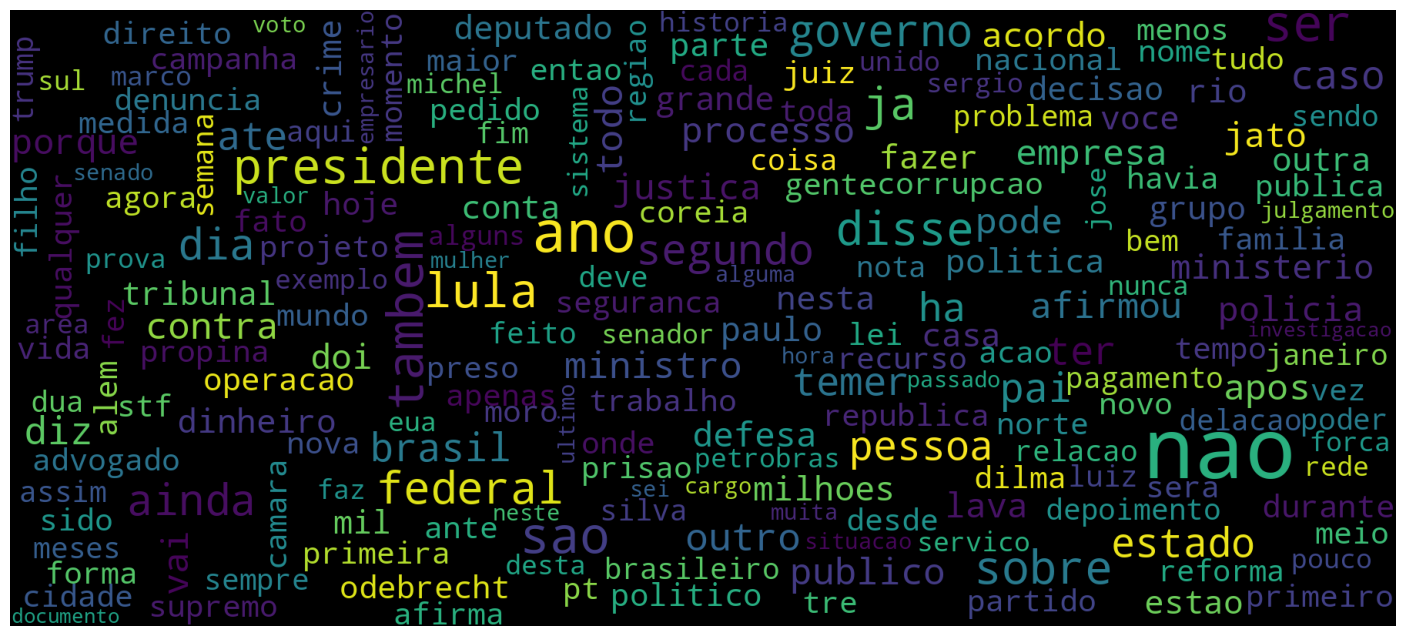

Fake news visualization: 


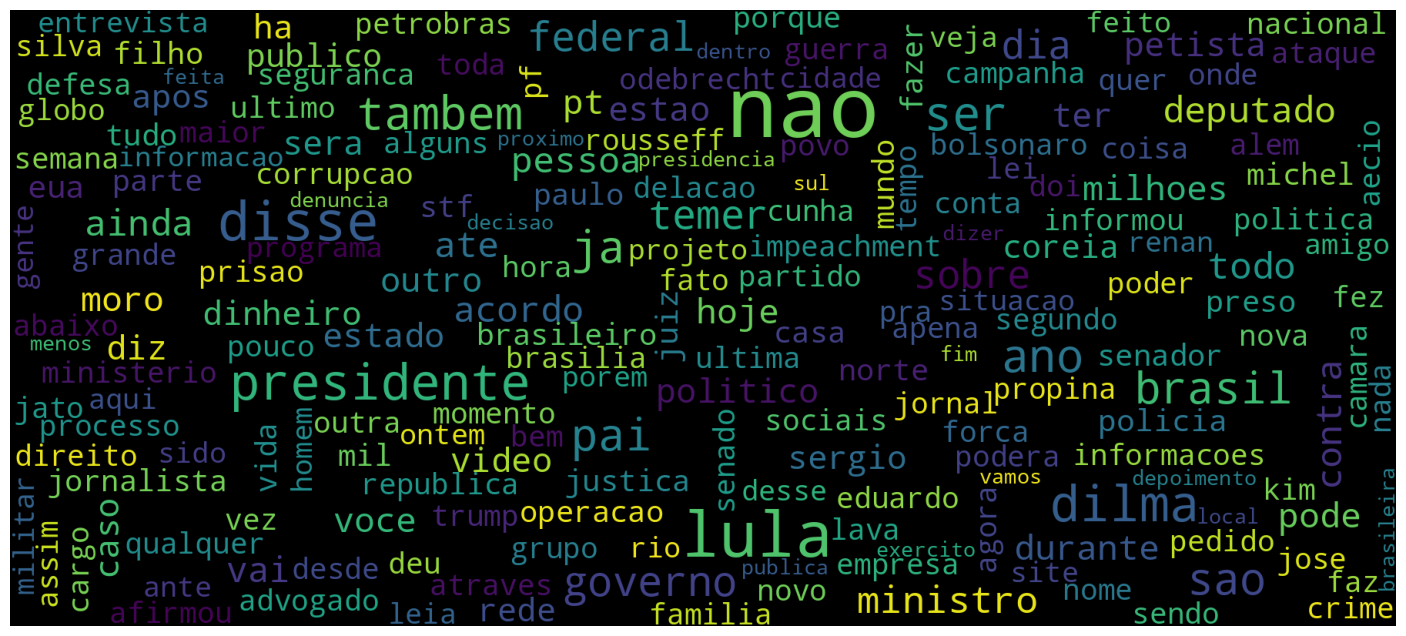

In [ ]:
print_wordcloud(fake_br_corpus_df, fake_br_corpus_corpus, true_lb='true')

Real news visualization: 


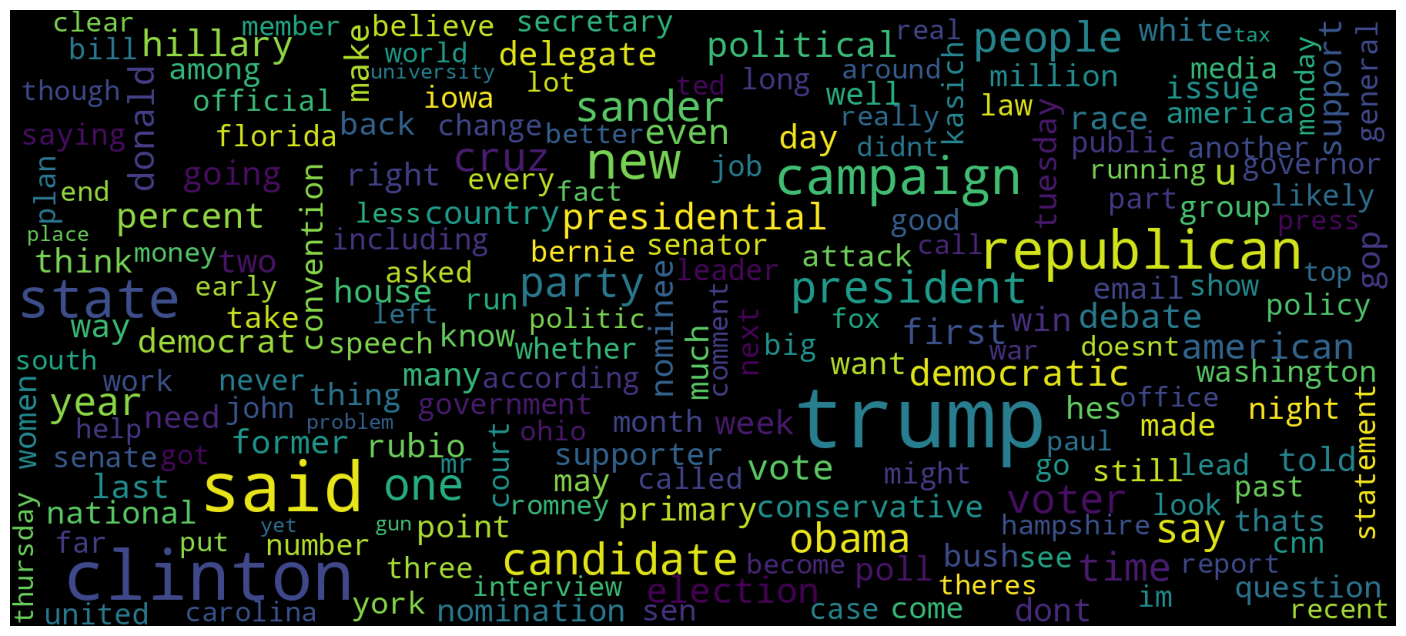

Fake news visualization: 


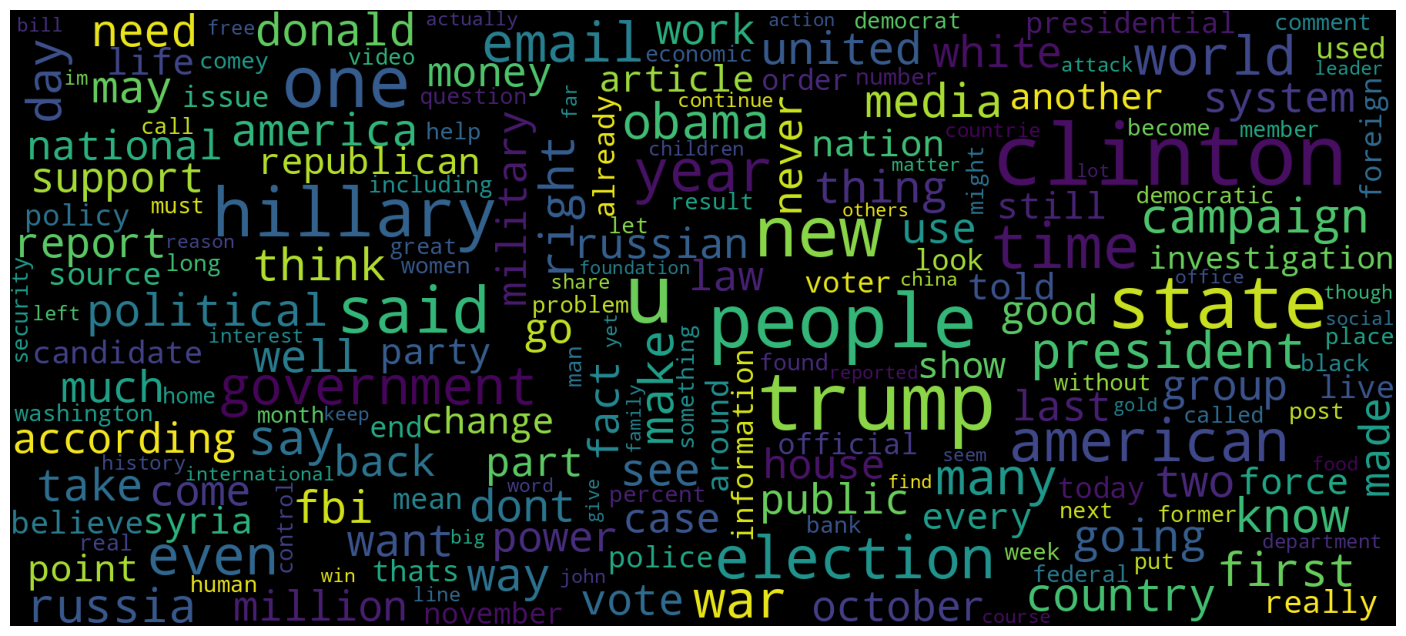

In [ ]:
print_wordcloud(fake_or_real_news_df, fake_or_real_news_corpus, true_lb="REAL")

### Training & evaluate:

In [83]:
fake_br_corpus_x = np.array([vectorize(sentence, fake_br_corpus_word2vec_model) for sentence in fake_br_corpus_corpus])
fake_br_corpus_y = fake_br_corpus_df['label'].apply(one_hot_label).to_numpy().ravel()

fake_br_corpus_x.shape, fake_br_corpus_y.shape

((7200, 100), (7200,))

In [165]:
fake_or_real_news_x = np.array([vectorize(sentence, fake_or_real_news_word2vec_model) for sentence in fake_or_real_news_corpus])
fake_or_real_news_y = fake_or_real_news_df['label'].apply(one_hot_label, args=("REAL",)).to_numpy().ravel()

fake_or_real_news_x.shape, fake_or_real_news_y.shape

((4594, 100), (4594,))

In [94]:
def cross_validation(model, _X, _y, folds=5):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      start = time.time()
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=folds,
                               scoring=_scoring,
                               return_train_score=True)
      end = time.time()
      
      return f"""Time estimated: {round(end - start, 4)}s
Train scores:
acc: {round(results['train_accuracy'].mean()*100, 4)};\tprcs: {round(results['train_precision'].mean(), 4)};\trcl: {round(results['train_recall'].mean(), 2)};\tf1: {round(results['train_f1'].mean(), 2)}
Test scores:
acc: {round(results['test_accuracy'].mean()*100, 4)};\tprcs: {round(results['test_precision'].mean(), 4)};\trcl: {round(results['test_recall'].mean(), 2)};\tf1: {round(results['test_f1'].mean(), 2)}"""

In [95]:
# Fake_Br_Corpus:

print('Naive Bayes:')
print(cross_validation(BernoulliNB(), fake_br_corpus_x, fake_br_corpus_y))
print('\nKNN:')
print(cross_validation(KNeighborsClassifier(n_neighbors=7), fake_br_corpus_x, fake_br_corpus_y))
print('\nSVM:')
print(cross_validation(SVC(kernel='linear', gamma='auto'), fake_br_corpus_x, fake_br_corpus_y))
print('\nRandom forest:')
print(cross_validation(RandomForestClassifier(n_estimators=951), fake_br_corpus_x, fake_br_corpus_y))

Naive Bayes:
Time estimated: 0.18s
Train scores:
acc: 69.1076;	prcs: 0.6816;	rcl: 0.72;	f1: 0.7
Test scores:
acc: 68.6806;	prcs: 0.6757;	rcl: 0.72;	f1: 0.7

KNN:
Time estimated: 1.3071s
Train scores:
acc: 74.2778;	prcs: 0.6646;	rcl: 0.98;	f1: 0.79
Test scores:
acc: 67.6111;	prcs: 0.6114;	rcl: 0.97;	f1: 0.75

SVM:
Time estimated: 10.1621s
Train scores:
acc: 82.4444;	prcs: 0.7901;	rcl: 0.88;	f1: 0.83
Test scores:
acc: 80.8611;	prcs: 0.7707;	rcl: 0.88;	f1: 0.82

Random forest:
Time estimated: 237.484s
Train scores:
acc: 100.0;	prcs: 1.0;	rcl: 1.0;	f1: 1.0
Test scores:
acc: 84.6111;	prcs: 0.8383;	rcl: 0.86;	f1: 0.85


In [166]:
# fake_real_news_dataset:

print('Naive Bayes:')
print(cross_validation(BernoulliNB(), fake_or_real_news_x, fake_or_real_news_y))
print('\nKNN:')
print(cross_validation(KNeighborsClassifier(n_neighbors=7), fake_or_real_news_x, fake_or_real_news_y))
print('\nSVM:')
print(cross_validation(SVC(kernel='rbf', gamma='auto'), fake_or_real_news_x, fake_or_real_news_y))
print('\nRandom forest:')
print(cross_validation(RandomForestClassifier(n_estimators=401), fake_or_real_news_x, fake_or_real_news_y))

Naive Bayes:
Time estimated: 0.1383s
Train scores:
acc: 78.5699;	prcs: 0.7904;	rcl: 0.78;	f1: 0.78
Test scores:
acc: 77.8633;	prcs: 0.7864;	rcl: 0.76;	f1: 0.77

KNN:
Time estimated: 0.7126s
Train scores:
acc: 89.8672;	prcs: 0.8868;	rcl: 0.91;	f1: 0.9
Test scores:
acc: 83.6308;	prcs: 0.8423;	rcl: 0.83;	f1: 0.83

SVM:
Time estimated: 3.6135s
Train scores:
acc: 87.5163;	prcs: 0.9058;	rcl: 0.84;	f1: 0.87
Test scores:
acc: 85.0024;	prcs: 0.8912;	rcl: 0.8;	f1: 0.84

Random forest:
Time estimated: 43.0493s
Train scores:
acc: 100.0;	prcs: 1.0;	rcl: 1.0;	f1: 1.0
Test scores:
acc: 85.6116;	prcs: 0.8995;	rcl: 0.8;	f1: 0.84
